<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos
============================

---

Unidad 4: Optimización de código: complejidad algorítmica y *profiling*
-----------------------------------------------------

---
### Instrucciones de uso

Este documento es un *notebook* interactivo que intercala explicaciones más bien teóricas de conceptos de programación con fragmentos de código ejecutables. Para aprovechar las ventajas que aporta este formato, se recomienda, en primer lugar, leer las explicaciones y el código que os proporcionamos. De esta manera tendréis un primer contacto con los conceptos que se exponen. Ahora bien, **¡la lectura es solo el principio!** Una vez que hayáis leído el contenido proporcionado, no olvidéis ejecutar el código proporcionado y modificarlo para crear variantes, que os permitan comprobar que habéis entendido su funcionalidad y explorar los detalles de la implementación. Por último, se recomienda también consultar la documentación enlazada para explorar con más detalle las funcionalidades de los módulos presentados.



Para guardar posibles modificaciones que hagáis a este *notebook*, os aconsejamos que montéis la unidad de Drive en Google Colaboratory (colab). Ejecutad las siguientes instrucciones:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab_Notebooks/unit_4_pcd

/content/drive/MyDrive/Colab_Notebooks/unit_4_pcd


**Importante**:

**Nota 1:** Este *notebook* contiene fragmentos de código que son lentos de ejecutar y/o que consumen bastante memoria. Los valores de entrada están ajustados para que el *notebook* pueda ejecutarse en pocos minutos en las máquinas disponibles en Google Colab. En caso de que descarguéis el *notebook* y trabajéis  en otro entorno (máquina virtual o ordenador propio), es posible que tengáis menos recursos. En ese caso, el *notebook* puede tardar mucho en ejecutar o generar errores de memoria. Si es así, simplemente ajustad los valores de entrada de las funciones de las células que generan problemas (por ejemplo, reducir el tamaño de las listas de entrada).

### Introducción

En esta unidad, veremos como podemos analizar nuestro código, tanto desde el punto de vista algorítmico como de implementación, con el objetivo de optimizarlo para hacerlo más eficiente. Esto nos permitirá diseñar e implementar un código que sea capaz de trabajar con grandes conjuntos de datos.

En primer lugar, pondremos el énfasis en la distinción entre algoritmos e implementaciones, dos conceptos que hasta ahora no hemos trabajado de manera separada.

Seguidamente, explicaremos las nociones básicas para analizar algoritmos. Veremos como podemos analizar la complejidad temporal de un algoritmo y dos de las notaciones más comunes para expresarla.

Después, nos centraremos en el análisis de implementaciones hechas en Python, presentando algunas de las herramientas que se pueden usar para analizar el tiempo de ejecución de código Python.

A continuación, se incluye la tabla de contenidos, que podéis usar para navegar por el documento:

[Programación para la ciencia de datos](#scrollTo=cpwDBB2Fbxtv)

>[Unidad 4: Optimización de código: complejidad algorítmica y profiling](#scrollTo=cpwDBB2Fbxtv)

>>[Instrucciones de uso](#scrollTo=cpwDBB2Fbxtv)

[Algoritmos e implementaciones](#scrollTo=ZBypJ8gBbxt3)

[Análisis de algoritmos](#scrollTo=4-CXO3AWbxt4)

>[2.1. Problemas computacionales y algoritmos](#scrollTo=4-CXO3AWbxt4)

>[2.2. Análisis de algoritmos](#scrollTo=7MHpXd9ybxt9)

>>[2.2.1. Contando pasos](#scrollTo=7MHpXd9ybxt9)

>>[2.2.2. Comportamiento asintótico](#scrollTo=EcfIus2obxt-)

>>[2.2.3. Notaciones y definiciones formales](#scrollTo=u_AXgJEkbxuB)

>>>[Notación theta](#scrollTo=u_AXgJEkbxuB)

>>>[Notación O grande](#scrollTo=1ChtI0J5bxuE)

>>[2.2.4. Ejemplos adicionales](#scrollTo=zhTwo6mqbxuG)

>[2.3. Consecuencias a nivel práctico](#scrollTo=6FWGDI8NbxuK)

[Análisis de implementaciones](#scrollTo=xLDct0UObxuM)

>[3.1. Profiling del tiempo de ejecución de un programa](#scrollTo=pBPQk_EebxuO)

>>[3.1.1. La instrucción mágica %time](#scrollTo=ClFOc9dLbxuP)

>>[3.1.2. La instrucción mágica %timeit](#scrollTo=dJZrGn5MbxuS)

>>[3.1.3. La instrucción mágica %lprun](#scrollTo=Rd_zbBDcbxuZ)

>>[3.1.4. El uso del profiling para optimizar implementaciones](#scrollTo=JPmDOSZ6bxub)

>>>[Ejemplo 1: RSA](#scrollTo=JPmDOSZ6bxub)

>>>[Ejemplo 2: Lectura manual de ficheros](#scrollTo=VwS4HzIKbxuj)

[Ejercicios para practicar](#scrollTo=2-Rejg9vbxur)

>[4.1. Soluciones a los ejercicios para practicar](#scrollTo=C3k-F_x3bxuw)

[Bibliografía](#scrollTo=oQ3l9Gn5bxu5)

>[5.1. Bibliografía básica](#scrollTo=oQ3l9Gn5bxu5)

>[5.2. Bibliografía adicional (ampliación de conocimientos)](#scrollTo=oQ3l9Gn5bxu5)



# 1. Algoritmos e implementaciones

Antes de adentrarnos en el campo de la evaluación de los algoritmos, es importante detenerse a pensar qué es un algoritmo. Hasta ahora, hemos visto cómo podemos solucionar varios problemas computacionales utilizando el lenguaje de programación Python: ¿son pues estos fragmentos de código Python, que solucionan problemas, algoritmos?

En esta asignatura se ha optado por explicar algorítmica y programación (codificación en Python) al mismo tiempo, explicando cómo podemos solucionar diferentes problemas computacionales, normalmente centrados en la ciencia de datos, en Python. Ahora bien, cada vez que planteábamos cómo solucionar un problema dado en Python, la creación de nuestras soluciones constaba, en el fondo, de dos pasos diferenciados:

1. Diseñar una posible solución al problema, es decir, decidir qué conjunto de pasos y en qué orden hay que hacerlos para solucionar el problema planteado.

2. Implementar este conjunto de pasos en Python, para poderlos ejecutar y proveer de una solución a una instancia concreta del problema planteado.

Así pues, hasta ahora hemos trabajado implícitamente en el diseño de algoritmos, sin hacer énfasis en el hecho de que un mismo algoritmo puede ser implementado de otras maneras, por ejemplo, utilizando algún otro lenguaje de programación o, incluso, sin ningún lenguaje de programación (como por ejemplo directamente como circuito eléctrico). En esta unidad, seguiremos trabajando en soluciones implementadas en Python, pero las analizaremos, en primer lugar, desde el punto de vista algorítmico y, en segundo lugar, en cuanto a implementación. Así, en esta primera parte de esta unidad, nos centraremos en analizar algoritmos. Después, en la segunda parte de la unidad, veremos cómo podemos analizar una cierta implementación de un algoritmo, en nuestro caso, en Python.


# 2. Análisis de algoritmos

## 2.1. Problemas computacionales y algoritmos

Volviendo pues a la pregunta que planteábamos al inicio de la unidad, podemos definir un **algoritmo** como un procedimiento computacional bien definido (no ambiguo) que comprende un conjunto de pasos o instrucciones computacionales. Un algoritmo toma un valor (o un conjunto de valores) como entrada y produce un valor (o conjunto de valores) como salida. Un algoritmo es pues una herramienta para solucionar un **problema computacional**.

Ejemplos de problemas computacionales que ya hemos trabajado pueden ser encontrar el valor máximo o mínimo de una secuencia de valores, ordenar una lista, eliminar los duplicados de una lista, o calcular el área de un círculo a partir de su radio. Formalmente, definimos un problema computacional especificando su entrada y su salida. Si tomamos como ejemplo el problema computacional de encontrar el valor máximo de una secuencia de valores numéricos, tendríamos:

* Entrada: una secuencia de valores numéricos, $\{e_0, e_1, \cdots, e_{n-1}\}$
* Salida: un único valor numérico, $e_i$, tal que $e_i \ge e_j$ para cualquier valor de $i$ y $j \in [0, n)$.

Un algoritmo para solucionar este problema computacional especifica pues los pasos a realizar para convertir la entrada (la secuencia $\{e_0, e_1, \cdots, e_{n-1}\}$) en la salida (el valor $e_i$ con las propiedades especificadas).

Diremos que una entrada concreta es una **instancia** del problema computacional. Por ejemplo, una instancia del problema anterior correspondería a la entrada `[3, 1, 2, 4]`.

Para solucionar un mismo problema computacional pueden existir algoritmos diferentes. Siguiendo con el ejemplo de encontrar el valor máximo de una secuencia, los siguientes dos algoritmos (codificados aquí en Python) permitirían solucionarlo:

In [3]:
def max_alg_1(lst):
    """
    Return the maximum element on the list lst
    """
    max_element = lst[0]
    for e in lst:
        if e > max_element:
            max_element = e

    return max_element


def max_alg_2(lst):
    """
    Return the maximum element on the list lst
    """
    current_lst, max_pairs = lst, []
    while(len(current_lst) > 1):
        for i in range(0, len(current_lst), 2):
            if len(current_lst) - 1 == i:
                max_pairs.append(current_lst[i])
            elif current_lst[i] > current_lst[i+1]:
                max_pairs.append(current_lst[i])
            else:
                max_pairs.append(current_lst[i+1])

        current_lst, max_pairs = max_pairs, []

    return current_lst[0]

El primer algoritmo inicializa el valor máximo (`max_element`) al primer elemento de la lista y, después, recorre la lista una única vez, comprobando para cada elemento de la lista si este es mayor que el valor máximo encontrado hasta entonces. En caso de que lo sea, se actualiza el valor máximo, que pasa a tomar el valor del elemento procesado.

El segundo algoritmo crea una nueva lista (`max_pairs`) con los valores máximos de cada par de elementos de la lista de entrada, por lo que esta nueva lista tendrá la mitad de los elementos que la primera. El algoritmo sigue haciendo este procedimiento, hasta que la nueva lista tiene un único elemento, que corresponde con el máximo.

Podemos comprobar cómo ambos algoritmos devuelven el resultado correcto del problema computacional de obtener el máximo de una secuencia para la instancia `[3, 1, 2, 4]`:


In [4]:
print(max_alg_1([3, 1, 2, 4]))
print(max_alg_2([3, 1, 2, 4]))

4
4


Diremos que un algoritmo es **correcto** si este siempre obtiene la salida correcta (es decir, si su ejecución siempre finaliza con la salida adecuada). En estos casos, también podemos decir que el algoritmo **soluciona** el problema computacional.


## 2.2. Análisis de algoritmos

Cuando hablamos de analizar algoritmos, nos referimos a evaluar los **recursos** que necesitarán para ejecutarse. Recordad que ahora, en esta primera parte de la unidad, hablamos de analizar algoritmos y no implementaciones: estamos interesados en evaluar la manera en que podemos solucionar un problema, y no su implementación específica en Python. Es evidente que dos implementaciones diferentes del mismo algoritmo pueden tener tiempos de ejecución diferentes, pero de eso hablaremos en la segunda parte de la unidad.

Aunque los recursos que puede consumir un algoritmo son varios (podemos hablar, por ejemplo, de memoria RAM, de ancho de banda de red, etc.), cuando analizamos algoritmos nos acostumbramos a centrar en el **tiempo** de computación, el tiempo que tardan en calcular la salida.

Además, nos interesará especialmente evaluar cómo se comporta el algoritmo cuando el **tamaño de la entrada** crece. La medida a usar para cuantificar el tamaño de la entrada dependerá del problema computacional que se trate. A menudo, la medida será el número de elementos de la entrada (como ocurre con el ejemplo del máximo, donde el tamaño de la entrada será el número de elementos de la secuencia). Otra medida habitual es el número de bits necesarios para representar la entrada (esta medida se utiliza, por ejemplo, en problemas de factorización o tests de primalidad).

### 2.2.1. Contando pasos

Así pues, ¿cómo podemos analizar el tiempo de ejecución de un algoritmo?
Vayamos por pasos y retomemos el ejemplo anterior: procederemos a analizar el tiempo de ejecución del algoritmo `max_alg_1`. Para ello contaremos cuántos pasos (cuántas operaciones primitivas) hay que hacer para ejecutar el algoritmo `max_alg_1` para una entrada dada (por ejemplo, para la lista` [3, 1, 2, 4]`), y asumiremos que todos los pasos tienen el mismo tiempo de ejecución. Esto no es del todo cierto, ya que hay operaciones más costosas que otras, pero como veremos nos permitirá tener una idea de lo que tarda en ejecutarse el algoritmo.

Así pues, los pasos a ejecutar por el algoritmo implementado en la función `max_alg_1` serían:

* Asignación del máximo inicial.
* Para cada elemento de la lista:
  * Recuperar el elemento de la lista.
  * Comparar si el elemento es mayor al máximo.
  * Si lo es, asignarlo al máximo (`max_element`).
    
    
Por lo tanto, para la entrada `[3, 1, 2, 4]`, el tiempo de ejecución del algoritmo sería:
$$ t_e = 1 + 2 * 4 + 1 = 10 $$
es decir, la asignación inicial, repetir cuatro veces la recuperación del elemento y la comparación y, en una ocasión, actualizar el máximo (cuando se procesa el elemento `4` se actualiza el máximo ya que $4>3$).

Ahora bien, hemos dicho que estábamos interesados en evaluar cómo se comportaba el algoritmo cuando el tamaño de la entrada crecía. ¿Qué pasaría, pues, con el tiempo de ejecución del algoritmo si el tamaño de la lista de entrada crece? ¿Cuántas operaciones habría que hacer para una lista de tamaño $n$?

Pues bien, podemos definir la función $t_e(n) $ como la función que devuelve el tiempo de ejecución dependiendo del tamaño de la entrada $n$. En el caso del algoritmo `max_alg_1`, la función sería:
$$ t_e (n) = 1 + 2n + x, $$
donde $ x $ sería el número de actualizaciones del valor máximo que hubiera que hacer, número que dependería de los valores específicos de la secuencia de entrada. Así pues, no podemos saber el número de instrucciones exacto que ejecutaría el algoritmo, ya que este depende de la instancia que se esté solucionando.

Este hecho es muy habitual cuando analizamos algoritmos: el tiempo de ejecución de la mayoría de los algoritmos depende de los valores específicos de entrada (y no solo de su tamaño). Así, cuando se analizan algoritmos, se suele considerar el **caso peor** (en inglés, es lo que se conoce como *worst-case analysis*), por lo que contamos cuántas instrucciones necesitaría el algoritmo para ejecutarse si la entrada es la más desfavorable posible.

Siguiendo con el ejemplo del algoritmo `max_alg_1`, el número de instrucciones a ejecutar en el caso peor sería pues:
$$ t_w (n) = 1 + 2n + n = 1 + 3n$$
y correspondería a actualizar el valor máximo para cada uno de los elementos de la entrada, lo que pasaría si la secuencia de entrada estuviera ordenada de manera creciente (por ejemplo, para la entrada `[1, 2, 3, 4]`).

Aunque normalmente utilizaremos esta medida para evaluar los algoritmos, a veces también nos interesará conocer el tiempo de ejecución en el **caso mejor**, que correspondería al número de instrucciones a ejecutar si la entrada es la más favorable posible.

Para el algoritmo `max_alg_1`, el tiempo de ejecución en el caso mejor sería:
$$ t_b (n) = 1 + 2n $$
y correspondería a no actualizar nunca el valor del máximo, lo que sucede si el primer elemento de la lista es el mayor (por ejemplo, para la entrada `[4, 1, 2, 3]`).

Finalmente, una tercera métrica que se puede utilizar para evaluar el tiempo de ejecución de los algoritmos es el tiempo de ejecución en el caso **medio**, que describe la media del tiempo de ejecución de todas las posibles entradas. Sin embargo, esta métrica se utiliza con poca frecuencia, ya que calcularla suele ser costoso: para hacerlo, debemos saber la distribución de probabilidad de las entradas del algoritmo, y debemos tener en cuenta el número de pasos que hay que hacer para cada una de las posibles entradas.

A partir de este momento, cuando hablamos del tiempo de ejecución de un algoritmo, nos referiremos al tiempo en el caso peor (a no ser que digamos explícitamente lo contrario), por lo que consideraremos que:
$$ t (n) = t_w (n). $$


### 2.2.2. Comportamiento asintótico

Conocer pues la función $ t (n) $ nos permite tener información sobre cómo de rápido es el algoritmo. Ahora bien, como hemos dicho, estamos interesados ​​en conocer cómo se comportan los algoritmos cuando el tamaño de la entrada crece mucho, es decir, queremos saber el **orden de crecimiento** del tiempo de ejecución del algoritmo.

Si nos fijamos pues en la función $t(n)$, podemos ver que está formada por dos términos: $1$ y $3n$. Entonces, si observamos el comportamiento de la función cuando $n$ crece mucho (es decir, si observamos el **comportamiento asintótico** de la función), el primer término es del todo despreciable, ya que el segundo término tiene mucho más peso. De este modo, podemos simplificar la expresión del tiempo de ejecución del algoritmo manteniendo únicamente el término de más peso, $3n.$

Adicionalmente, y siguiendo el mismo razonamiento de centrarnos en el comportamiento de la función cuando el tamaño de la entrada crece, podemos simplificar aún más la expresión, y eliminar el factor $3$ que precede a $n$, por lo que la expresión del tiempo de ejecución quedaría como únicamente $n$.

Utilizando la notación estándar para definir la complejidad de un algoritmo, utilizaremos la octava letra del alfabeto griego, theta, para describir el tiempo de ejecución en el caso peor de un algoritmo, y diremos pues que el algoritmo `max_alg_1` tiene un tiempo de ejecución en el peor caso de $\Theta(n)$, y también que $1 + 3n \in \Theta(n)$.

Vemos ahora, en primer lugar, de manera informal, por qué podemos hacer este proceso de seleccionar únicamente el término de crecimiento más rápido y eliminar los coeficientes en el análisis de los tiempos de ejecución de los algoritmos. Para intentar visualizarlo gráficamente, mostraremos una gráfica del crecimiento de varias funciones:


In [5]:
%matplotlib inline

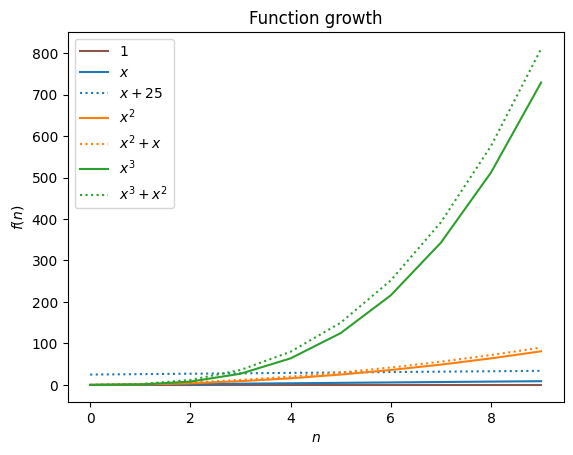

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_funs(xs):
    """
    Plot a set of predefined functions for the x values in 'xs'.
    """
    ys0 = [1 for x in xs]
    ys1 = [x for x in xs]
    ys1_b = [x + 25 for x in xs]
    ys2 = [x**2 for x in xs]
    ys2_b = [x**2 + x for x in xs]
    ys3 = [x**3 for x in xs]
    ys3_b = [x**3 + x**2 for x in xs]

    fig = plt.figure()
    plt.plot(xs, ys0, '-', color='tab:brown')
    plt.plot(xs, ys1, '-', color='tab:blue')
    plt.plot(xs, ys1_b, ':', color='tab:blue')
    plt.plot(xs, ys2, '-', color='tab:orange')
    plt.plot(xs, ys2_b, ':', color='tab:orange')
    plt.plot(xs, ys3, '-', color='tab:green')
    plt.plot(xs, ys3_b, ':', color='tab:green')

    plt.legend(["$1$", "$x$", "$x+25$", "$x^2$", "$x^2+x$", "$x^3$",
                "$x^3+x^2$"])

    plt.xlabel('$n$')
    plt.ylabel('$f(n)$')
    plt.title('Function growth')
    plt.show()


plot_funs(range(10))

Las líneas de un mismo color representan funciones que tienen el mismo grado. Así, la línea marrón que casi no se aprecia muestra una función constante ($ f (n) = 1 $), las líneas azules muestran funciones lineales ($ x $ y $ x + 25 $), las líneas naranjas funciones cuadráticas ($ x ^ 2 $ y $ x ^ 2 + x $), y las líneas verdes funciones cúbicas ($ x ^ 3 $ y $ x ^ 3 + x ^ 2 $). Para cada color, la línea continua (sólida) representa la función que contiene solo el término de mayor grado, y la línea de puntos es una función que tiene también otros términos de menor grado. Como se puede apreciar, el crecimiento de las funciones con el mismo grado es similar, sobre todo cuando crece el valor de $n$. Fijaos con la representación de las mismas funciones si aumentamos el valor de $n$ de 10 (gráfica anterior) a 100 (gráfica de la celda siguiente):


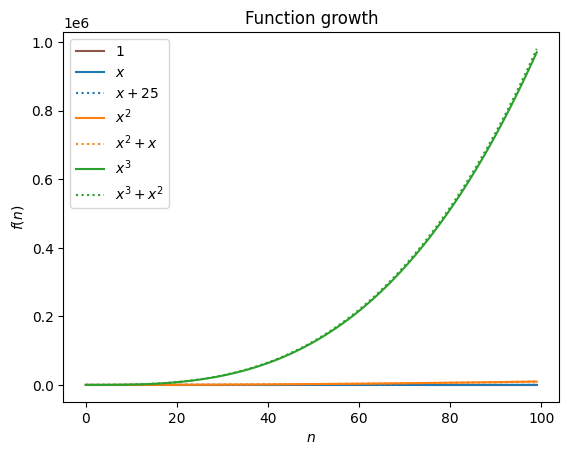

In [7]:
plot_funs(range(100))

Es decir, de manera informal, diremos que el tiempo de ejecución en el peor caso de un algoritmo es del orden del término de mayor grado de la función $ t (n) $, ya que el crecimiento de esta función cuando $n$ se hace muy grande es muy similar a la de funciones que tienen otros términos de menor grado.


### 2.2.3. Notaciones y definiciones formales

#### Notación theta

Vemos ahora, en segundo lugar, de manera formal, la definición de $\Theta$, y el motivo por el cual podemos decir que $1 + 3n \in \Theta(n)$.

Dada una función $g(n)$, denotamos con $\Theta(g(n))$ el conjunto de funciones siguiente:

$$\Theta(g(n)) = \{ f(n) :
    \exists c_1, c_2 \text{ y } n_0 > 0
    \text{ tales que  }
    0 \leq c_1g(n) \leq f(n) \leq c_2g(n),
    \forall n \ge n_0 \}$$

Es decir, $\Theta(g(n))$ es el conjunto de funciones para los que existen constantes positivas $c_1$ y $c_2$ tales que la función se encuentra *en medio* de $c_1g(n)$ y $c_2g(n)$ para valores $n$ grandes (valores de $n$ superiores a $n_0$).

Así, efectivamente, $1 + 3n \in \Theta(n)$, ya que, por ejemplo, para $c_1 = 2$ y $c_2 = 4$, $n_0 = 1$, se cumplen las condiciones de la definición anterior. Veámoslo gráficamente:


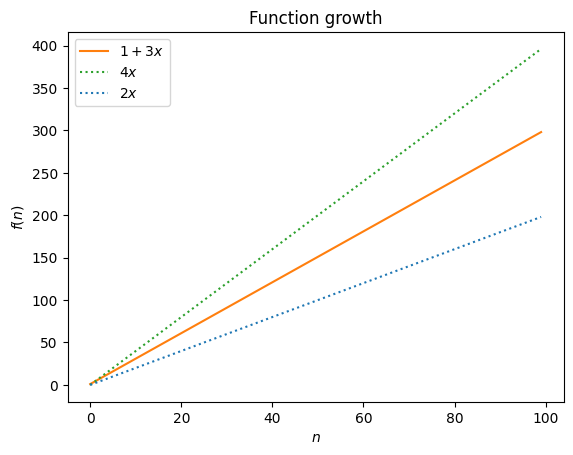

In [8]:
def plot_funs_theta(xs, n_val=False, sup_only=False):
    """
    Plot the function 1+3x together with a lower bound (2x) and an
    upper bound (4x).
    """
    legend, c1, c2, n0 = [], 2, 4, 1

    ys_f, leg_f = [1 + 3*x for x in xs], "$1+3x$"
    ys_low, leg_low = [c1*x for x in xs], "$2x$"
    ys_high, leg_high = [c2*x for x in xs], "$4x$"

    fig = plt.figure()

    plt.plot(xs, ys_f, '-', color='tab:orange')
    legend.append(leg_f)
    plt.plot(xs, ys_high, ':', color='tab:green')
    legend.append(leg_high)

    if not sup_only:
        plt.plot(xs, ys_low, ':', color='tab:blue')
        legend.append(leg_low)

    if n_val:
        plt.plot([n0, n0], [0, max(ys_high)], '--', color='tab:gray')

    plt.legend(legend)
    plt.xlabel('$n$')
    plt.ylabel('$f(n)$')
    plt.title('Function growth')
    plt.show()


plot_funs_theta(range(100))

Efectivamente, la función $ 1 + 3x $ se encuentra *en medio* de las funciones $2x$ y $4x$ para valores de $n$ *grandes*. ¿Qué pasa, sin embargo, con el valor $n_0$ a partir del cual esto es cierto? ¿Por qué es necesario incluir este valor $ n_0 $ a la expresión? Si nos fijamos con el comportamiento de la función para valores pequeños, lo veremos claramente:


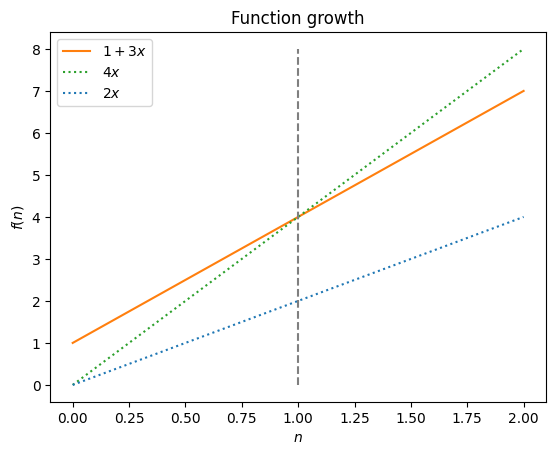

In [9]:
plot_funs_theta(range(3), True)

En el caso de la función $ 1 + 3x $, la función se encuentra por encima tanto de $ 2x $ como de $ 4x $ para valores menores a 1 (que es el término independiente de $ 1 + 3x $). Es por ello que en la definición, consideramos el parámetro $ n_0 $ a partir del cual la función se encuentra, efectivamente, *en medio* de $c_1g(n)$ y $c_2g(n)$.

Nótese también que los valores de las constantes no son únicos, y habría otros valores de constantes $ c_1 $, $ c_2 $ y $ n_0 $ para los que la condición $c_1g(n) \leq f(n) \leq c_2g(n)$ también se cumpliría. Los valores de las constantes no son importantes, y lo que nos interesa es saber si existen algunos por los que se cumple la condición.

Considerando la complejidad de un algoritmo a partir del crecimiento de su tiempo de ejecución, se utilizan los siguientes términos para describir los algoritmos:
* $\Theta{(1)} $: algoritmo de tiempo constante
* $\Theta{(log(n))} $: algoritmo logarítmico
* $\Theta{(n)} $: algoritmo lineal
* $\Theta{(n*log(n))} $: algoritmo casi-lineal
* $\Theta{(n^2)} $: algoritmo cuadrático
* $\Theta{(n^a)} $: algoritmo multinomial (a> 2)
* $\Theta{(e^n)} $: algoritmo exponencial
* $\Theta{(n!)} $: algoritmo con complejidad factorial



#### Notación O grande

Como hemos visto, la complejidad de un algoritmo expresada a partir de $\Theta$ nos da unos umbrales asintóticos "estrechos" para la función del tiempo de ejecución del algoritmo, $t(n)$, informando tanto del límite inferior como del superior de esta. Cuando solo conocemos el límite superior, utilizaremos la notación de O grande (que describiremos con el símbolo $\mathcal{O}$).

Dada una función $g(n)$, denotamos con $\mathcal{O}(g(n))$ el conjunto de funciones siguiente:

$$\mathcal{O}(g(n)) = \{ f(n) :
    \exists c_2 \text{ y } n_0 > 0
    \text{ tales que  }
    0 \leq f(n) \leq c_2g(n),
    \forall n \ge n_0 \}$$

Si nos fijamos en la definición de $\mathcal{O}$, podemos observar cómo es similar a la definición que habíamos hecho de $\Theta$, pero, en este caso, solo limitamos la función por encima (hemos reducido las restricciones en cuanto a los valores mínimos de la función). Si lo queremos visualizar gráficamente como hemos hecho anteriormente y siguiendo con el mismo ejemplo, tendríamos que $1 + 3n \in \mathcal{O}(n)$, ya que, por ejemplo, para $c_2 = 4$, $n_0 = 1$, se cumplen las condiciones de la definición anterior:

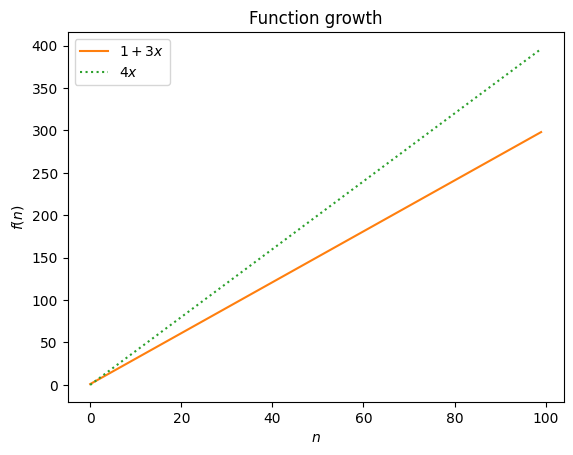

In [10]:
plot_funs_theta(range(100), False, True)

Teniendo en cuenta esta definición, podemos decir que $\Theta(g(n)) \subseteq \mathcal{O}(g(n))$, ya que, efectivamente, todas las funciones $f(n)$ que estén dentro del conjunto $\Theta(g(n))$ también estarán dentro del conjunto $\mathcal{O}(g(n))$. Ahora bien, la implicación contraria no es cierta. Siguiendo con el ejemplo que hemos estado viendo, tendríamos que $1 + 3n \in \mathcal{O}(n)$ y también $1 + 3n \in \Theta(n)$; pero, en cambio $1 + 3n \in \mathcal{O}(n^2)$ pero $1+3n \notin \Theta(n ^ 2)$. En efecto, $ 1 + 3n \notin \Theta(n^2)$, ya que no hay ningún valor $c_1$ tal que $c_1n^2 \leq 1 + 3n$ para todo $n \ge n_0$.


Utilizar $\mathcal{O}$ para cuantificar la complejidad temporal de un algoritmo nos permite calcular esta complejidad de manera más sencilla que como lo hemos hecho hasta ahora: no es necesario contar minuciosamente las instrucciones que habría que ejecutar para obtener $t(n)$ y luego extraer el término de mayor grado, sino que podemos deducir la complejidad observando la estructura del código (su flujo de ejecución). En general, la complejidad $\mathcal{O}$ de un programa vendrá determinada por los bucles que tenga y por cómo estén distribuidos.

Así pues, si revisitamos el algoritmo `max_alg_1`, podemos ver que este tiene un único bucle, que itera por todos los elementos de la secuencia de entrada. Así, efectivamente, el algoritmo `max_alg_1` tiene una complejidad de $\mathcal{O}(n) $.



### 2.2.4. Ejemplos adicionales

Para acabar de entender los conceptos explicados en esta unidad, veremos ahora un par de ejemplos más de análisis de algoritmos:


**Ejemplo 1**

El algoritmo `hypotenuse` calcula el tamaño de la hipotenusa de un triángulo a partir de las medidas de sus lados.


In [11]:
import math


def hypotenuse(a, b):
    """
    Compute the length of the hypotenuse of a triangle
    of legs 'a' and 'b'.
    """
    a_sq = a**2
    b_sq = b**2
    c_sq = a_sq + b_sq
    c = math.sqrt(c_sq)
    return c

In [12]:
c = hypotenuse(15, 16)
print("The hypot. of a triang. with legs 15 and 16 is:\t{}".format(c))

The hypot. of a triang. with legs 15 and 16 is:	21.93171219946131


Si nos fijamos en el código de este algoritmo, podemos ver como consta de una serie de pasos, que se ejecutan uno detrás del otro, sin incluir ninguna instrucción que altere el flujo de ejecución del código. Por lo tanto, podemos decir que el algoritmo tiene un tiempo de ejecución constante:
$$t(n) \in \mathcal{O}(1)$$

En efecto, si procedemos, como lo hemos hecho la primera vez, a contar minuciosamente las instrucciones que forman el código, veríamos que para cualquier valor de entrada, el código ejecutaría siempre:
* Dos potencias
* Una suma
* Una raíz cuadrada

De modo que tendríamos que el número de instrucciones sería siempre $4$ (es decir, $t(n) = 4$), y si nos quedamos con el término de mayor grado y eliminamos el coeficiente, tenemos que $t(n) \in \mathcal{O}(1)$.


**Ejemplo 2**

El algoritmo `words_in_a_not_in_b` devuelve una lista de todas las palabras que hay en la lista que recibe como primer parámetro que no se encuentran también en la lista que recibe como segundo parámetro.


In [13]:
def words_in_a_not_in_b(a, b):
    """
    Return the words in the list 'a' that are not present
    in the list 'b'.
    """
    result = []
    for word_a in a:
        found = False
        for word_b in b:
            if word_a == word_b:
                found = True
        if not found:
            result.append(word_a)

    return result

In [14]:
words_1 = ["The", "Magic", "Words", "are", "Squeamish", "Ossifrage"]
words_2 = ["Martin", "Gardner", "Mathematical", "Games", "column", "Words",
           "are", "powerful"]
r = words_in_a_not_in_b(words_1, words_2)
print("Words in words_1 but not in words_2:\t\t{}".format(r))

Words in words_1 but not in words_2:		['The', 'Magic', 'Squeamish', 'Ossifrage']


En este caso, observando el algoritmo, podemos ver como este tiene un bucle externo que itera por los elementos de la primera lista, y un segundo bucle dentro de este primero, que itera por los elementos de la segunda lista. Por lo tanto, si consideramos que los dos parámetros que recibe el algoritmo crecen de manera similar, entonces el tiempo de ejecución del algoritmo cumpliría que:
$$t(n) \in \mathcal{O}(n^2)$$

ya que en el peor de los casos se ejecutarán $n$ veces las instrucciones dentro del bucle externo y, para cada una de esas veces, se ejecutará $n$ veces el bucle interno.

De nuevo, procedemos a contar las instrucciones individualmente, para comprobar el resultado. En este caso, el algoritmo ejecutaría:
* Una asignación
* Para cada elemento de la lista `a`:
  * Recuperar el elemento
  * Una asignación
  * Para cada elemento de la lista `b`:
    * Recuperar el elemento
    * Hacer una comparación
    * Hacer una asignación (`found = True`)
  * Hacer una comparación
  * Añadir un elemento a la lista (`result.append(word_a)`)
    
Tened en cuenta que estamos considerando el peor de los casos, ya que asumimos que la asignación de dentro del bucle interno (`found = True`) y la instrucción de añadir un elemento a la lista con el resultado (`result.append(word_a)`) están ejecutando siempre, y eso no sería cierto para todos los valores de entrada. ¿Cuántas instrucciones ejecutaría pues el algoritmo para una entrada de tamaño $n$ (asumiendo que las dos listas tienen el mismo tamaño $n$)? En este caso, tendríamos:
$$t(n) = 1 + n(2 + 3n + 2) = 1 + n(4+3n) = 1 + 4n + 3n^2$$
y si nos quedamos solo con el término de crecimiento más rápido podemos decir que:
$$t(n) \in \mathcal{O}(n^2)$$
tal como ya habíamos deducido observando el flujo de ejecución inicialmente.


## 2.3. Consecuencias a nivel práctico

Llegados a este punto nos podríamos plantear por qué es importante evaluar la complejidad algorítmica de los algoritmos que implementamos. Pues bien, más allá de los conceptos teóricos, conocer la complejidad de los algoritmos nos permite saber cómo se comportarán cuando tengamos que trabajar con conjuntos de datos grandes y, adicionalmente, nos permite comparar varios algoritmos para seleccionar el más eficiente. A menudo, cuando trabajamos con conjuntos de datos pequeños, no será necesario fijarnos en la complejidad de los algoritmos que diseñamos, ya que podremos ejecutarlos sin problemas. Ahora bien, cuando diseñamos algoritmos para tratar con conjuntos grandes de datos, tendremos que tener mucho cuidado y tratar de hacerlos lo más eficientes posible, ya que sino estos tardarán mucho en ejecutarse o, incluso, podrán hacer que no sea posible obtener soluciones para nuestros problemas.

En esta primera parte de la unidad nos hemos centrado en evaluar algoritmos, y no implementaciones. Sin embargo, a modo de ejemplo, veremos las consecuencias de tener implementaciones de algoritmos con diferentes grados de complejidad. En concreto, veremos un ejemplo de las librerías oficiales de Python, y analizaremos cómo se comportan los algoritmos que implementan los test de pertenencia en *conjuntos* y en *listas* en Python. Para ello implementamos una función que genera una secuencia aleatoria de enteros no repetidos de tamaño $n$ que recibe como parámetro, y comprueba si existe un elemento concreto (por defecto, el valor `0`) dentro de esta secuencia. En primer lugar, trataremos la secuencia como *conjunto*, y calcularemos el tiempo que se tarda en buscar el elemento en el conjunto. En segundo lugar, trataremos la secuencia como *lista*, y repetiremos el mismo proceso. Para analizar siempre el caso peor, buscaremos un elemento que no está nunca en la secuencia:

In [15]:
import numpy as np
import time


def test_membership(n, element=0):
    rand_array = np.random.randint(low=1, high=2147483647, size=n)
    rand_set = set(rand_array)
    rand_list = list(rand_set)

    start_time = time.time()
    element in rand_set
    middle_time = time.time()
    element in rand_list
    stop_time = time.time()

    set_time = middle_time - start_time
    list_time = stop_time - middle_time
    print("\tMembership test in set:\t\t{} seconds".format(set_time))
    print("\tMembership test in list:\t{} seconds".format(list_time))

    return set_time, list_time

Ahora, ejecutaremos la función anterior para diferentes valores de *n*, y veremos cómo evoluciona el tiempo de ejecución:


n = 1
	Membership test in set:		7.152557373046875e-07 seconds
	Membership test in list:	4.76837158203125e-07 seconds
n = 10
	Membership test in set:		2.384185791015625e-07 seconds
	Membership test in list:	1.1920928955078125e-06 seconds
n = 100
	Membership test in set:		4.76837158203125e-07 seconds
	Membership test in list:	5.0067901611328125e-06 seconds
n = 1000
	Membership test in set:		4.76837158203125e-07 seconds
	Membership test in list:	4.696846008300781e-05 seconds
n = 10000
	Membership test in set:		7.152557373046875e-07 seconds
	Membership test in list:	0.000514984130859375 seconds
n = 100000
	Membership test in set:		1.1920928955078125e-06 seconds
	Membership test in list:	0.0037283897399902344 seconds
n = 1000000
	Membership test in set:		1.430511474609375e-06 seconds
	Membership test in list:	0.08791351318359375 seconds
n = 10000000
	Membership test in set:		9.5367431640625e-07 seconds
	Membership test in list:	0.9422369003295898 seconds


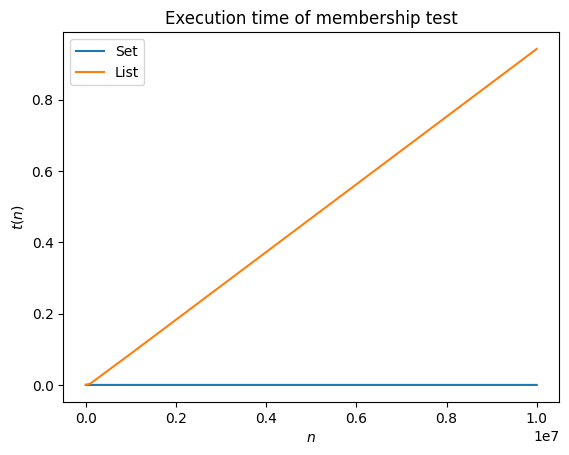

In [16]:
# Podéis ajustar los valores de xs en función de la memoria disponible en la
# máquina donde se ejecuta este código. Probad a añadir números mayores si
# la máquina tiene suficiente memoria, o eliminar los últimos valores de la
# lista si la ejecución de este código genera alguna excepción por falta
# de memoria.
xs = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
ys_set, ys_list = [], []
for x in xs:
    print("n = {}".format(x))
    s, li = test_membership(x)
    ys_set.append(s)
    ys_list.append(li)

plt.figure()
plt.plot(xs, ys_set, xs, ys_list)
plt.legend(["Set", "List"])
plt.xlabel('$n$')
plt.ylabel('$t(n)$')
plt.title("Execution time of membership test")
plt.show()

Pues bien, más allá de posibles detalles de implementación que puedan afectar a este tiempo, lo que estamos viendo es la consecuencia de que la complejidad del algoritmo que implementa Python para comparar si un elemento pertenece a un conjunto es $\mathcal{O}(1)$, mientras que la complejidad del algoritmo implementado para las listas es $\mathcal{O}(n)$. Así, para valores pequeños de $n$, los dos algoritmos tienen un tiempo de ejecución similar; pero a medida que el valor de $n$ crece, el algoritmo sobre el conjunto es mucho más rápido que el que actúa sobre la lista. Las diferencias son ya muy notables para listas de un millón de elementos y ¡el algoritmo sobre listas tiene solo una complejidad lineal (imaginad qué pasaría si este fuera cuadrático o incluso exponencial)!


# 3. Análisis de implementaciones



El apartado anterior explica cómo se puede calcular la complejidad del tiempo de ejecución de un algoritmo. Ahora bien, una vez hemos decidido el algoritmo que utilizaremos para solucionar el problema que queremos afrontar, deberemos implementarlo (para poderlo utilizar para resolver instancias del problema). En este apartado, veremos cómo podemos analizar implementaciones de algoritmos hechas en Python.

Mientras que en el apartado anterior hemos obviado el tiempo de ejecución de las instrucciones individuales que conformaban un algoritmo (recordad cuando contábamos instrucciones, que todas eran consideradas como equivalentes), lo cierto es que no todas las instrucciones tardan lo mismo en ejecutarse. Este tiempo, sin embargo, depende de la implementación, por lo que no tiene sentido incorporarlo cuando hablamos de complejidad del algoritmo. Ahora que evaluaremos las implementaciones, sí que consideraremos este tiempo.

Llamamos análisis del rendimiento del código (en inglés, **_profiling_**) al análisis del comportamiento de un programa, midiendo por ejemplo el tiempo de ejecución o el espacio de memoria necesario para ejecutarlo.

Ya conocemos algunas alternativas para analizar las implementaciones en Python. Por ejemplo, en el último apartado de la sección anterior hemos visto una manera muy rudimentaria de hacer *profiling* de código Python, calculando el tiempo de ejecución de la instrucción `element in rand_set` (o `rand_list`) con la librería `time`, restando el tiempo actual justo antes de ejecutar la instrucción del tiempo actual justo después de ejecutar la instrucción. Ahora bien, como os podéis imaginar, esta alternativa puede ser útil para comprobar cuánto tarda en ejecutarse un fragmento de código, pero será del todo inadecuada si queremos instrumentar todo un programa entero.

También en unidades anteriores hemos visto cómo podemos saber cuánto ocupa una variable en memoria en Python usando la función `getsizeof` del módulo `sys`.


In [17]:
from sys import getsizeof
a = 42
# Mostramos el espacio (en bytes) de la variable a
getsizeof(a)

28

De nuevo, esta estrategia puede servir para saber cuánto ocupa una variable concreta, pero es poco práctica para evaluar programas enteros.

En las secciones siguientes veremos algunas alternativas para analizar implementaciones en Python basadas en el uso de instrucciones mágicas de los *notebooks*.


## 3.1. *Profiling* del tiempo de ejecución de un programa


### 3.1.1. La instrucción mágica `%time`


Una alternativa que nos permite calcular el tiempo de ejecución de una función es la instrucción mágica `%time`, que muestra el tiempo total de ejecución de una línea de código. En concreto, `%time` muestra
* Tiempo de reloj de pared (`Wall time`): es el tiempo total desde el inicio de la ejecución de la función hasta el final de la ejecución de la misma, tal como lo mediría un reloj de pared o un cronómetro externo.
* Tiempo de CPU: tiempo de procesamiento de la función, es la cantidad de tiempo que la CPU ha utilizado para procesar las instrucciones de la función. Este tiempo se encuentra dividido en tiempo de usuario (`user`) y de sistema (`sys`), dependiendo de si se están ejecutando instrucciones en modo de usuario o de kernel.

Veamos algunos ejemplos:


In [18]:
%time sum(np.random.randint(low=1, high=2147483647, size=1000))

CPU times: user 172 µs, sys: 26 µs, total: 198 µs
Wall time: 201 µs


1068436451583

In [19]:
%time hypotenuse(15, 16)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 7.87 µs


21.93171219946131

In [20]:
rand_list = np.random.randint(low=1, high=2147483647, size=10)
%time max_alg_1(rand_list)

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 26.2 µs


2037352162

In [21]:
rand_list = np.random.randint(low=1, high=2147483647, size=10000)
%time max_alg_1(rand_list)

CPU times: user 1.15 ms, sys: 19 µs, total: 1.17 ms
Wall time: 1.17 ms


2146896869

Tened en cuenta que `%time` puede utilizarse para evaluar el tiempo de ejecución de una única línea de código, que puede ser una llamada a una función, una evaluación de una expresión, etc.

También podemos utilizar `%time` para comparar el tiempo de ejecución del test de pertenencia sobre listas y conjuntos, como hacíamos en la sección anterior:


In [22]:
n = 10000000
rand_array = np.random.randint(low=1, high=2147483647, size=n)
rand_set = set(rand_array)
rand_list = list(rand_set)

%time 5 in rand_set
%time 5 in rand_list

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 4.53 µs
CPU times: user 904 ms, sys: 0 ns, total: 904 ms
Wall time: 903 ms


False

### 3.1.2. La instrucción mágica `%timeit`


La instrucción mágica `%time` ejecuta la instrucción a medir una única vez y devuelve su tiempo de ejecución. En cambio, la variante `%timeit` ejecuta la instrucción múltiples veces, y muestra el tiempo de ejecución medio de las diversas ejecuciones y la desviación típica.


In [23]:
%timeit sum(np.random.randint(low=1, high=2147483647, size=1000))

95.1 µs ± 6.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
%timeit hypotenuse(15, 16)

668 ns ± 96.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [25]:
rand_list = np.random.randint(low=1, high=2147483647, size=10)
%timeit max_alg_1(rand_list)

1.37 µs ± 68.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
rand_list = np.random.randint(low=1, high=2147483647, size=10000)
%timeit max_alg_1(rand_list)

644 µs ± 6.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Tened en cuenta que en general los tiempos obtenidos con `%timeit` son inferiores a los que se obtienen con `%time`. Esto se debe a que `%timeit` intenta minimizar las interferencias mientras se está haciendo la medida, con el fin de ofrecer únicamente el tiempo de ejecución de la instrucción en sí.

Por defecto, el número de veces que se ejecutará la instrucción se ajusta automáticamente en función del tiempo que tarda en ejecutarse: las instrucciones que necesitan más tiempo se ejecutan menos veces, mientras que las que tardan menos tiempo se ejecutan más veces.

In [27]:
n = 10000000
rand_array = np.random.randint(low=1, high=2147483647, size=n)
rand_set, rand_list = set(rand_array), list(rand_set)

%timeit 5 in rand_set
%timeit 5 in rand_list

31.5 ns ± 7.17 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
980 ms ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Así, en el ejemplo de la celda anterior, la comprobación sobre el conjunto se ha ejecutado 10000000 veces en cada ronda, mientras que la misma comprobación sobre la lista (que ya hemos visto que es más lenta) se ha ejecutado únicamente una sola vez por ronda. El número de rondas por defecto está fijado siempre a 7. El hecho de que el número de ejecuciones se ajuste automáticamente hace que el programador no tenga que estar pendiente de cuántas veces quiere hacer la medida para evitar que esta tarde mucho tiempo.

Ahora bien, el número de ejecuciones también se puede ajustar manualmente, indicándolo con el parámetro `-n` (número de ejecuciones por ronda) y `-r` (número de rondas):


In [28]:
# Ejecución de timeit con valores por defecto
%timeit hypotenuse(15, 16)

616 ns ± 27.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [29]:
# Ejecución de timeit indicando 10 ejecuciones
%timeit -n 10 hypotenuse(15, 16)

879 ns ± 121 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
# Ejecución de timeit indicando 10 ejecuciones y 3 rondas
%timeit -n 10 -r 3 hypotenuse(15, 16)

990 ns ± 141 ns per loop (mean ± std. dev. of 3 runs, 10 loops each)


Tanto `time` como `timeit` pueden utilizarse también para instrumentar fragmentos de código de más de una línea. En este caso, en vez de anteponer un único símbolo de porcentaje a la instrucción, escribiremos dos:


In [31]:
%%time

n = 10000000
rand_array = np.random.randint(low=1, high=2147483647, size=n)
rand_set, rand_list = set(rand_array), list(rand_set)

5 in rand_set
5 in rand_list

CPU times: user 3.28 s, sys: 213 ms, total: 3.49 s
Wall time: 3.5 s


False

### 3.1.3. La instrucción mágica `%lprun`


A menudo no estaremos interesados en saber cuánto tarda en ejecutarse una línea o una celda de código en su globalidad, sino que querremos saber cuánto tarda en ejecutarse cada línea de una función y, sobre todo, queremos identificar qué línea o líneas de la función son las que están consumiendo más tiempo de ejecución. En este caso, podemos utilizar `%lprun`, que devuelve un análisis línea a línea de la ejecución de una función.

A diferencia de las instrucciones mágicas anteriores, para usar `%lprun` habrá que cargar primero la extensión `line_profiler`. Después, podremos utilizar `%lprun` como hemos estado haciendo hasta ahora con `%time` y `%timeit`:


Para poder utilizar lprun en colab, primero es necesario instalarlo:

In [32]:
pip install line_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 19.9 MB/s eta 0:00:00


In [33]:
%load_ext line_profiler

In [34]:
%lprun -f hypotenuse hypotenuse(15, 16)

El resultado de ejecutar `lprun` se visualiza en una ventana en la parte inferior del *notebook*, y consta de una tabla con los tiempos de ejecución por línea. En concreto, en la tabla se presenta el número de línea del código ( `Line #`); el número de veces que se ha ejecutado esa misma línea (`Hits`); el tiempo total que el programa ha dedicado a ejecutar aquella línea (`Time`) utilizando como unidad de tiempo la que se indica en la parte superior de la ventana (`Timer unit`), que en este caso son microsegundos; la media del tiempo dedicado a cada línea (`Per Hit`), que corresponde al tiempo total dedicado a aquella línea dividido entre el número de veces que se ha ejecutado la línea; el porcentaje de tiempo relativo al total de la función que se ha dedicado a ejecutar aquella línea (`%Time`); y, finalmente, el código fuente de la línea analizada (`Line Contents`). Adicionalmente, también se muestra el tiempo total de ejecución de toda la función (`Total time`).

Si nos fijamos en el resultado de la ejecución de la celda anterior, veremos que cada línea se ha ejecutado una única vez, por lo que el tiempo total (`Time`) y la media (`Per Hit`) para cada línea son exactamente los mismos. A continuación ejecutamos `lprun` para la función `max_alg_1`, que buscaba el valor máximo de una lista iterando por cada uno de los elementos:


In [35]:
%lprun -f max_alg_1 max_alg_1([2, 0, 4, 3, 6])

En este caso, podemos ver como las líneas 5 y 10 se ejecutan una única vez (corresponden a la asignación inicial del máximo y el retorno de la función), pero, en cambio, el resto de instrucciones del código se ejecutan varias veces: el for se ejecuta seis veces (la lista tiene cinco elementos, y se ejecutará una vez adicional en la que el iterador informará que se ha llegado al final de la lista); el condicional se ejecuta cinco veces, una por cada elemento de la lista de entrada; y la asignación del elemento máximo se ejecuta dos veces, que corresponden a las veces en que un número de la lista es superior al máximo encontrado hasta el momento.

Así, ahora podemos ver el tiempo total dedicado a cada línea, así como la media de cada ejecución individual.

### 3.1.4. El uso del *profiling* para optimizar implementaciones

El uso de herramientas de *profiling* nos permite mejorar el tiempo de ejecución de nuestros programas, ayudando a identificar las secciones de código que consumen más recursos. A modo de ejemplo, veremos cómo podemos optimizar una implementación del algoritmo de cifrado [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem)), lo que nos permitirá usarlo con claves de tamaño real, y cómo optimizar la extracción de datos concretos de un fichero.

#### Ejemplo 1: RSA


El RSA es un algoritmo de clave pública o asimétrica: cada usuario del sistema tiene un par de claves, una pública, que se utiliza para cifrar y es conocida por todo el mundo; y una privada, que se utiliza para descifrar y que solo es conocida por el usuario. Cada una de las claves está formada por dos enteros. Las dos funciones siguientes implementan el cifrado y descifrado del algoritmo RSA, respectivamente.

In [36]:
def rsa_cipher(plaintext, public_key):
    """
    Cipher the 'plaintext' with the ' public_key' using RSA.
    """
    e, n = public_key
    ciphertext = plaintext**e
    ciphertext = ciphertext % n
    return ciphertext


def rsa_decipher(ciphertext, private_key):
    """
    Decipher the 'ciphertext' with the ' private_key' using RSA.
    """
    d, n = private_key
    plaintext = ciphertext**d
    plaintext = plaintext % n
    return plaintext

Tanto la función de cifrado como la de descifrado son muy simples, y devuelven el resultado de elevar el mensaje a la primera componente de la clave y calcular el resultado módulo en la segunda componente de la clave. Creamos a continuación una función que nos permita comprobar que el algoritmo de cifrado funciona correctamente, asegurando que el texto que se obtiene de descifrar un texto cifrado es igual al original:


In [37]:
def test_rsa(message, public_key, private_key):
    # Cifra el mensaje en claro con la clave pública
    c = rsa_cipher(message, public_key)
    # Descifra el mensaje cifrado con la clave privada
    d = rsa_decipher(c, private_key)
    print("Original msg:\t\t{}".format(message))
    print("Ciphered msg:\t\t{}".format(c))
    print("Deciphered msg:\t\t{}".format(d))
    print("Original = deciphered?:\t{}".format(d == message))

Ahora, hacemos una primera prueba de cifrado, cifrando el mensaje `42` con una clave de 16 bits, y descifrando el resultado para comprobar que obtenemos de nuevo el `42` original. Notad que las claves utilizadas se han calculado previamente, para que sean [claves RSA válidas] (Nótese que las claves utilizadas se han calculado previamente, para que sean [claves RSA válidas](https://en.wikipedia.org/wiki/RSA_(cryptosystem)#Key_generation).


In [38]:
# Ciframos y desciframos utilizando claves de 16 bits
public_key = [7, 40247]
private_key = [11383, 40247]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		9584
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 2.4 ms, sys: 16 µs, total: 2.41 ms
Wall time: 2.6 ms


El ejemplo anterior tarda menos de un segundo en ejecutarse, pero utiliza claves de solo 16 bits. El NIST (National Institute of Standards and Technology) recomienda actualmente utilizar claves de 2048 bits, que se prevén seguras hasta 2030. ¿Podríamos utilizar nuestra implementación del RSA para cifrar y descifrar con claves de este tamaño? Pues bien, si hacemos una prueba con solo 24 bits, veremos como el tiempo de ejecución aumenta muy rápidamente, lo que hace imposible el cálculo para claves de 2048 bits:


In [39]:
# Ciframos y desciframos utilizando claves de 24 bits
public_key = [5, 12374501]
private_key = [2473481, 12374501]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		6946222
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 17.8 s, sys: 79.5 ms, total: 17.9 s
Wall time: 21.3 s


Si queremos utilizar claves de tamaño real, deberíamos plantearnos la mejora de nuestra implementación. Para ello, en primer lugar habría que identificar qué instrucciones son las que están consumiendo más tiempo. Esto podemos hacerlo ejecutando `%lprun` sobre la función `test_rsa`:


In [40]:
%lprun -f test_rsa test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		6946222
Deciphered msg:		42
Original = deciphered?:	True


Observando el resultado de `%lprun` vemos que, claramente, la función que está consumiendo más tiempo es la función de descifrado, `rsa_decipher`. De hecho, `%lprun` nos indica que esta función consume el 100% del tiempo de ejecución de la función `test_rsa`, un resultado debido al redondeo, ya que vemos que las otras funciones también requieren de unos microsegundos para ejecutarse. Proseguimos pues a analizar línea a línea la ejecución de la función de descifrado:

In [41]:
%lprun -f rsa_decipher rsa_decipher(6946222, private_key)

De nuevo, el tiempo de ejecución de la función se concentra en una única línea, que es la que calcula la exponenciación (`plaintext = ciphertext**d`). Efectivamente, elevar un número a otro número muy grande es una operación costosa, y que hace que el resultado sea un valor muy grande. Para las claves y el mensaje que estamos utilizando, ¡el resultado del cálculo es un valor de 56216775 bits!

¿Cómo podemos, pues, optimizar este cálculo? Tened en cuenta que, en realidad, no necesitamos el resultado de la exponenciación, sino que necesitamos saber este resultado módulo otro valor (el valor `n`). Por lo tanto, podemos utilizar algún algoritmo de exponenciación modular, que son mucho más eficientes. Probemos, pues, a modificar el código de la función de descifrado, y volvamos a evaluar el tiempo de ejecución de la función `test_rsa` para claves de 16 y 24 bits:


In [42]:
def rsa_decipher(ciphertext, private_key):
    d, n = private_key
    plaintext = pow(ciphertext, d, n)
    return plaintext

In [43]:
# Ciframos y desciframos utilizando claves de 16 bits
public_key = [7, 40247]
private_key = [11383, 40247]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		9584
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 2.35 ms, sys: 8 µs, total: 2.36 ms
Wall time: 2.32 ms


In [44]:
# Ciframos y desciframos utilizando claves de 24 bits
public_key = [5, 12374501]
private_key = [2473481, 12374501]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		6946222
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 54 µs, sys: 1 µs, total: 55 µs
Wall time: 57.5 µs


El cambio ha sido todo un éxito: la ejecución para 24 bits, que tardaba una veintena de segundos, ¡tarda ahora solo unos microsegundos! Probemos ahora a cifrar el mismo mensaje utilizando claves de tamaño real, en este caso, de 1024 bits:

In [45]:
# Ciframos y desciframos utilizando claves de 1024 bits
public_key = [3, 134245651075486790648261375398130187145281413357710194120435058020218300828669509213188037920311289006263619039350590273222199038755803180076713360550458023782521999394415401419640233565477224152240445478506710159787815598560446071360862164293277093399794855829526947744315750213202787538332896821825045117629]
private_key = [89497100716991193765507583598753458096854275571806796080290038680145533885779672808792025280207526004175746026233726848814799359170535453384475573700305333610315116489021502675714069680250800492460238214938540131583511517986199094292966363549384310709540708653327744880402332474712052844481260944826363678187, 134245651075486790648261375398130187145281413357710194120435058020218300828669509213188037920311289006263619039350590273222199038755803180076713360550458023782521999394415401419640233565477224152240445478506710159787815598560446071360862164293277093399794855829526947744315750213202787538332896821825045117629]
message = 42
%time test_rsa(message, public_key, private_key)

Original msg:		42
Ciphered msg:		74088
Deciphered msg:		42
Original = deciphered?:	True
CPU times: user 4.23 ms, sys: 0 ns, total: 4.23 ms
Wall time: 5.79 ms


En efecto, ¡la ejecución ha finalizado después de unos pocos milisegundos!


#### Ejemplo 2: Lectura manual de ficheros

En el siguiente ejemplo veremos que a veces matamos moscas a cañonazos. En particular, si tenemos un archivo de datos en el que sólo tenemos que hacer o buscar algo muy concreto, veremos cómo nos sale más a cuenta leer el fichero como caracteres y no usar la librería `pandas` para cargar el fichero completo. Obviamente si queremos trabajar sobre el dataset entero, `pandas` nos será muy útil para operar con las columnas del archivo, pero para pequeñas manipulaciones, evitar usar un dataframe puede ser mucho más eficiente, especialmente si nuestro dataset es muy pesado.

A continuación os mostramos un ejemplo donde claramente podemos ver la diferencia entre usar un método u otro para leer el archivo.

Dado el archivo `space_mission_data.csv`, queremos contar cuántos registros tenemos por cada `company_name`. Para ellos crearemos dos funciones, una usando `pandas` para cargar el fichero entero en un `dataframe` y la otra de lectura manual, que dado el archivo de entrada lean los datos y agrupen/cuenten por `company_name`.

In [46]:
import pandas as pd
file_input = 'data/space_mission_data.csv'

In [47]:
def read_as_df(file_input):
    """
    file_input: csv
    Read input file as dataframe and group by company name
    Return a dictionary with keys company name and values the
        number of registers for that key.
    """
    data = pd.read_csv(file_input)
    company_df = data[['company_name', 'id']].groupby('company_name').count()
    return company_df.to_dict()

In [48]:
def read_as_char(file_input):
    """
    file_input: csv
    Read input file line by line and count registers for each company name
    Return a dictionary with keys company name and values the number of
        registers for that key.
    """
    company = dict()
    with open(file_input) as f:
        headers = f.readline()
        data = f.readlines()

        for line in data:
            # base and day, the date is on the first column
            # and the format is MM/DD/YY
            c = line.split(',')[1]
            if c not in company:
                company[c] = 1
            else:
                company[c] += 1

    return company

In [49]:
# Compute time for each function
%time rdf = read_as_df(file_input)

CPU times: user 12.6 ms, sys: 1.99 ms, total: 14.6 ms
Wall time: 295 ms


In [50]:
%time rc = read_as_char(file_input)

CPU times: user 3.88 ms, sys: 2.02 ms, total: 5.9 ms
Wall time: 8.82 ms


Podemos ver que pese a usar un csv pequeño la diferencia de tiempo es ya considerable. Veamos qué nos dice el *profiling* sobre las dos implementaciones:

In [51]:
# Cargamos la librería para hacer el profiling de cada función
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [52]:
%lprun -f read_as_df read_as_df(file_input)

In [53]:
%lprun -f read_as_char read_as_char(file_input)

Con el *profiler* podemos ver que la función que usa `pandas` (`read_as_df`) se pasa la mayor parte del tiempo cargando el archivo (la línea con `pd.read_csv`), mientras que si usamos la funcion de lectura de caracteres los tiempos están repartidos en las diferentes partes de la función: lectura y conteo. Pandas cuando carga un archivo hace mucho más que solo leer el fichero (que sería el caso de cuando leemos línea por línea a nivel de caracteres): un **dataframe** es algo mucho **más complejo y con mucha más estructura**. Por ello, tenemos que tener cuidado cuando decidamos leer un fichero de datos y el tiempo de lectura sea un factor a considerar, ya que dependiendo de qué queramos hacer sobre los datos no hará falta usar `pandas` y, además, su uso nos incrementará el tiempo de lectura.

# 4. Ejercicios para practicar

A continuación encontraréis un conjunto de problemas que os pueden servir para practicar los conceptos explicados en esta unidad. Os recomendamos que intentéis realizar estos problemas vosotros mismos y que, una vez realizados, comparéis la solución que proponemos con vuestra solución. No dudéis en dirigir todas las dudas que surjan de la resolución de estos ejercicios o bien de las soluciones propuestas al foro del aula.

1. Generad una o varias gráficas que permitan comparar el crecimiento de una función constante, una logarítmica, una lineal, una cuadrática, una cúbica y una exponencial.


In [54]:
# Respuesta:

2. Calculad la complejidad $\Theta$ de los algoritmos que tienen los siguientes tiempos de ejecución $t(n)$:

  1. $ t (n) = 5n ^ 4 + n ^ 3 + n + 4 $
  2. $ t (n) = n ^ 3 + n ^ 2 $
  3. $ t (n) = e ^ n + 2 ^ n $
  4. $ t (n) = e ^ n + n ^ 3 $
  5. $ t (n) = n + \ log (n) $
  6. $ t (n) = 100 ^ n + n! $


Respuesta:


3. Decid cuáles de estas afirmaciones son ciertas:
    1. $2n^2 + n \in \mathcal{O}(n)$
    2. $2n^2 + n \in \mathcal{O}(n^2)$
    3. $2n^2 + n \in \mathcal{O}(n^3)$
    4. $2n^2 + n \in \Theta(n)$
    5. $2n^2 + n \in \Theta(n^2)$
    6. $2n^2 + n \in \Theta(n^3)$
    7. $\log(n) + n^3  \in \mathcal{O}(n^2)$
    8. $\log(n) + n^3  \in \mathcal{O}(n^3)$
    9. $\log(n) + n^3  \in \mathcal{O}(n!)$


Respuesta:


4. Dad el tiempo del caso mejor ($t_b(n)$) y el tiempo del caso peor ($t_w(n)$) del siguiente algoritmo. Para cada caso, escribid también su complejidad temporal $\mathcal{O}$ y una instancia del problema que tenga este tiempo de ejecución.

In [55]:
def linear_search(lst, element):
    """
    Return the index of the first appearance of 'element' in 'lst'
    or -1 if the 'element' is not in the 'lst'.
    """
    for i, e in enumerate(lst):
        if e == element:
            return i
    return -1

Respuesta:


5. Implementad un algoritmo con complejidad $\mathcal{O}(n ^ 3)$. Decid (informalmente) cuál es el problema computacional que resuelve el algoritmo que proponéis y dad dos instancias de ejemplo.


In [56]:
# Respuesta

Respuesta:


6. Indicad la complejidad $\mathcal{O}$ de los siguientes algoritmos que resuelven el mismo problema computacional. Decid cuál es el problema computacional que resuelven y cuál de los dos algoritmos utilizaríais si tuvieráis que trabajar con problemas de tamaño grande.

In [57]:
def max_element_alg1(list_1, list_2):
    max_element = list_1[0]
    for e in list_1 + list_2:
        if e > max_element:
            max_element = e
    return max_element


def max_element_alg2(list_1, list_2):
    max_element = list_1[0]
    for e1 in list_1:
        for e2 in list_2:
            aux = max(e1, e2)
            if aux > max_element:
                max_element = aux
    return max_element

7. El código siguiente calcula cuántos números resultantes de productos de dos números de 4 cifras son múltiplos de 11. Optimizad el código para mejorar su tiempo de ejecución. Considerad mejoras tanto desde el punto de vista algorítmico como de implementación.

Nota: reducid el tiempo de ejecución, como mínimo, un orden de magnitud.

In [58]:
def prod_mult_11():
    result = []
    l1 = list(range(1000, 10000))
    l2 = list(range(1000, 10000))
    for i in l1:
        for j in l2:
            if i*j % 11 == 0:
                result.append(i*j)
    return len(result)

In [59]:
prod_mult_11()

14071239

In [60]:
# Respuesta

## 4.1. Soluciones a los ejercicios para practicar

1. Generad una o varias gráficas que permitan comparar el crecimiento de una función constante, una logarítmica, una lineal, una cuadrática, una cúbica y una exponencial.


In [61]:
# Respuesta:

import math


def plot_growth(xs, log_x=False):
    """
    Plot a predefined set of functions for a given set of x values (xs).
    """
    ys0 = [1 for x in xs]  # constant
    ys1 = [math.log(x) for x in xs]  # logarithmic
    ys2 = [x for x in xs]  # linear
    ys3 = [x**2 for x in xs]  # quadratic
    ys4 = [x**3 for x in xs]  # cubic
    ys5 = [math.exp(x) for x in xs]  # exponential

    plt.plot(xs, ys0, xs, ys1, xs, ys2, xs, ys3, xs, ys4, xs, ys5)
    plt.legend(["$1$", "$log(x)$", "$x$", "$x^2$", "$x^3$", "$e^x$"])

    if log_x:
        plt.yscale('log')

    plt.xlabel('$n$')
    plt.ylabel('$f(n)$')
    plt.title('Function growth')

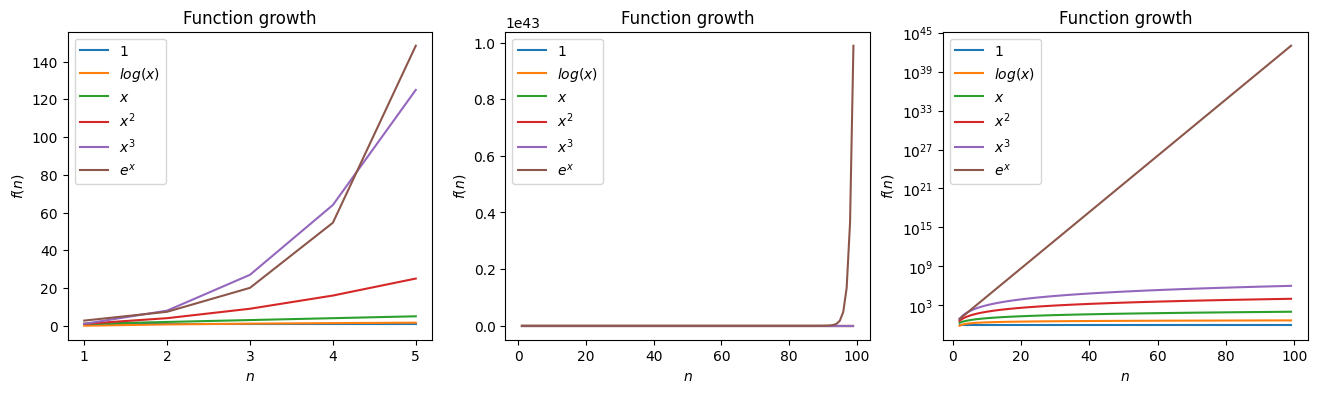

In [62]:
fig = plt.figure(figsize=(16, 4))
fig.subplots(1, 3)

# Plot the functions over different x ranges
plt.subplot(1, 3, 1)
xs = range(1, 6)
plot_growth(xs, log_x=False)

plt.subplot(1, 3, 2)
xs = range(1, 100)
plot_growth(xs, log_x=False)

plt.subplot(1, 3, 3)
xs = range(2, 100)
plot_growth(xs, log_x=True)

Las dos primeras gráficas muestran las seis funciones utilizando una escala lineal. Si mostramos únicamente los valores para el intervalo $ [1, 6) $ (figura de la izquierda), vemos como la función exponencial es la que crece más rápido a partir de $ x = 5 $, y podemos comparar también los crecimientos del resto de funciones. Si mostramos los valores en el intervalo $ [1, 100) $ con una escala lineal (figura central), ya solo somos capaces de distinguir el comportamiento de la función exponencial, y todas las demás funciones quedan agrupadas con un crecimiento mucho menor. Por último, si mostramos las funciones en este mismo intervalo pero utilizando una escala logarítmica para el eje y (figura de la derecha), podemos volver a apreciar el crecimiento de todas las funciones.


2. Calculad la complejidad $\Theta$ de los algoritmos que tienen los siguientes tiempos de ejecución $t(n)$:

  1. $ t (n) = 5n ^ 4 + n ^ 3 + n + 4 $
  2. $ t (n) = n ^ 3 + n ^ 2 $
  3. $ t (n) = e ^ n + 2 ^ n $
  4. $ t (n) = e ^ n + n ^ 3 $
  5. $ t (n) = n + \ log (n) $
  6. $ t (n) = 100 ^ n + n! $


2. Respuestas:
    1. $t(n)=5n^4 + n^3 + n + 4 \in \Theta(n^4)$
    2. $t(n)=n^3 + n^2 \in \Theta(n^3)$
    3. $t(n)=e^n + 2^n \in \Theta(e^n)$
    4. $t(n)=e^n + n^3 \in \Theta(e^n)$
    5. $t(n)= n  + \log(n) \in \Theta(n)$
    6. $t(n)=100^n + n! \in \Theta(n!)$



3. Decid cuáles de estas afirmaciones son ciertas:
    1. $2n^2 + n \in \mathcal{O}(n)$
    2. $2n^2 + n \in \mathcal{O}(n^2)$
    3. $2n^2 + n \in \mathcal{O}(n^3)$
    4. $2n^2 + n \in \Theta(n)$
    5. $2n^2 + n \in \Theta(n^2)$
    6. $2n^2 + n \in \Theta(n^3)$
    7. $\log(n) + n^3  \in \mathcal{O}(n^2)$
    8. $\log(n) + n^3  \in \mathcal{O}(n^3)$
    9. $\log(n) + n^3  \in \mathcal{O}(n!)$


3. Respuestas:
 1. Falso, ya que no existe ningún par de valores $c_2, n_0$ para los que $2n^2+n \leq c_2n$ para todo $n \ge n_0$.
 2. Cierto.
 3. Cierto.
 4. Falso, ya que no existe ningún par de valores $ c_2, n_0 $ para los que $2n^2+n \leq c_2n$ para todo $n \ge n_0$.
 5. Cierto.
 6. Falso, ya que no hay ningún par de valores $ c_1, n_0 $ tales que $c_1n^3 \leq 2n^2+n$ para todo $n \ge n_0$.
 7. Falso, ya que no existe ningún par de valores $ c_2, n_0 $ para los que $\log(n) + n^3 \leq c_2n^2$ para todo $n \ge n_0$.
 8. Cierto.
 9. Cierto.
    
    
4. Dad el tiempo del caso mejor ($t_b(n)$) y el tiempo del caso peor ($t_w(n)$) del siguiente algoritmo. Para cada caso, escribid también su complejidad temporal $\mathcal{O}$ y una instancia del problema que tenga este tiempo de ejecución.


In [63]:
def linear_search(lst, element):
    """
    Return the index of the first appearance of 'element' in 'lst'
    or -1 if the 'element' is not in the 'lst'.
    """
    for i, e in enumerate(lst):
        if e == element:
            return i
    return -1

Respuesta:

El tiempo del caso mejor se da cuando el elemento a buscar es el primer elemento de la lista. En este caso, el tiempo de ejecución es $t_b(n) = 3$ (dos asignaciones, de las variables `i` y` e` y una comparación) y, por lo tanto, la complejidad temporal es $\mathcal{O}(1)$. Una instancia de este caso podría ser para los valores de entrada `[1, 2, 3, 4]` y `1`.

El tiempo del caso peor se da cuando el elemento a buscar no está en la lista. En este caso, el tiempo de ejecución es $ t_w(n) = 3n $ y, por lo tanto, la complejidad temporal es $\mathcal{O}(n)$. Una instancia de este caso podría ser para los valores de entrada `[1, 2, 3, 4]` y `5`.

5. Implementad un algoritmo con complejidad $\mathcal{O}(n ^ 3)$. Decid (informalmente) cuál es el problema computacional que resuelve el algoritmo que proponéis y dad dos instancias de ejemplo.


Respuesta:

El siguiente algoritmo resuelve el problema computacional de generar una lista de todas las palabras de tres letras que se pueden crear utilizando las letras de la palabra `l1` en la primera posición, las letras de la palabra `l2` en la segunda posición, y las letras de la palabra `l3` en la tercera posición.

Ejemplos de instancias de este problema serían las entradas `"ABC"`, `"ABC"`, `"ABC"`, que generaría todas las palabras de tres letras que se pueden hacer con las letras `A`, `B ` y `C`; o bien `"ABC"`, `"_"`, `"123"`, que generaría todas las posibles palabras de tres letras con las letras `A`, `B` o `C` en la primera posición, un guion en la segunda posición, y los números `1`, `2` o `3` en la tercera posición.

In [64]:
# Respuesta


def three_letter_words(l1, l2, l3):
    r = []
    for let1 in l1:
        for let2 in l2:
            for let3 in l3:
                r.append(let1 + let2 + let3)
    return r

In [65]:
l1, l2, l3 = "ABC", "ABC", "ABC"
print(three_letter_words(l1, l2, l3))

['AAA', 'AAB', 'AAC', 'ABA', 'ABB', 'ABC', 'ACA', 'ACB', 'ACC', 'BAA', 'BAB', 'BAC', 'BBA', 'BBB', 'BBC', 'BCA', 'BCB', 'BCC', 'CAA', 'CAB', 'CAC', 'CBA', 'CBB', 'CBC', 'CCA', 'CCB', 'CCC']


In [66]:
l1, l2, l3 = "ABC", "_", "123"
three_letter_words(l1, l2, l3)

['A_1', 'A_2', 'A_3', 'B_1', 'B_2', 'B_3', 'C_1', 'C_2', 'C_3']

6. Indicad la complejidad $\mathcal{O}$ de los siguientes algoritmos que resuelven el mismo problema computacional. Decid cuál es el problema computacional que resuelven y cuál de los dos algoritmos utilizaríais si tuvieráis que trabajar con problemas de tamaño grande.

In [67]:
def max_element_alg1(list_1, list_2):
    max_element = list_1[0]
    for e in list_1 + list_2:
        if e > max_element:
            max_element = e
    return max_element


def max_element_alg2(list_1, list_2):
    max_element = list_1[0]
    for e1 in list_1:
        for e2 in list_2:
            aux = max(e1, e2)
            if aux > max_element:
                max_element = aux
    return max_element

Respuesta:

Los dos algoritmos resuelven el problema computacional de encontrar el valor máximo de entre los valores de dos listas. Formalmente:

* Entrada: dos secuencias de valores numéricos, $\{e_0, e_1, \cdots, e_{m-1}\}$, $\{e_m, e_{m+1}, \cdots, e_{n-1}\}$
* Salida: un único valor numérico, $e_i$, tal que $e_i \ge e_j$ para cualquier valor de $i$ y $j \in [0, n)$.

El primer algoritmo tiene una complejidad $\mathcal{O}(n)$, ya que tiene un único bucle que recorre todos los elementos de entrada. El segundo algoritmo tiene una complejidad $\mathcal{O}(n^2)$, ya que tiene un bucle externo que recorre la primera lista y un bucle interno, dentro del bucle externo, que recorre todos los elementos de la segunda lista.

Por lo tanto, si tuviéramos que trabajar con listas grandes, utilizaríamos el primer algoritmo, ya que es más eficiente (tiene menor complejidad temporal).

7. El código siguiente calcula cuántos números resultantes de productos de dos números de 4 cifras son múltiplos de 11. Optimizad el código para mejorar su tiempo de ejecución. Considerad mejoras tanto desde el punto de vista algorítmico como de implementación.

Nota: reducid el tiempo de ejecución, como mínimo, un orden de magnitud.

In [68]:
def prod_mult_11():
    result = []
    l1 = list(range(1000, 10000))
    l2 = list(range(1000, 10000))
    for i in l1:
        for j in l2:
            if i*j % 11 == 0:
                result.append(i*j)
    return len(result)

In [69]:
prod_mult_11()

14071239

Respuesta:

En primer lugar, observando el algoritmo podemos ver como se itera dos veces sobre dos listas de números de 4 cifras, se calcula el producto de un valor de la primera lista por un valor de la segunda, se comprueba si este es múltiplo de 11 y, si lo es, se añade a la lista de resultados. Hay dos optimizaciones claras de este algoritmo, que provienen de las siguientes observaciones:

* Para que el resultado sea múltiplo de 11, al menos uno de los dos números que multiplicamos debe ser múltiplo de 11. Por lo tanto, podríamos crear una primera lista con solo los números de 4 cifras múltiplos de 11, y una segunda lista con todos los números de 4 cifras. Así, nos evitamos muchas iteraciones (ya que la primera lista será más pequeña) y, al mismo tiempo, muchos cálculos de divisibilidad. Además, los cálculos de divisibilidad pasan a ser sobre números más pequeños (de 4 cifras en vez de sobre el producto).
* Solo queremos saber el número de números que cumplen la condición del enunciado y no cuáles son estos números. Por lo tanto, en vez de guardarlos en una lista y después mirar cuántos elementos tiene la lista, podemos directamente contar cuántos números cumplen las condiciones, teniendo en cuenta la observación anterior.

En segundo lugar, fijándonos en la implementación, vemos que hay también algunas ineficiencias, como la conversión del `range` a una lista antes de usarlo.

Observando el resultado de `%lprun`, confirmamos algunas de nuestras observaciones:


In [70]:
%lprun -f prod_mult_11 prod_mult_11()

Atendiendo al tiempo de ejecución por ejecución (`Per Hit`), vemos como este es muy alto para las dos asignaciones de las listas `l1` y `l2`. Mirando el porcentaje de tiempo de la función dedicado a cada línea, vemos como la línea donde se está más tiempo es la comprobación de la divisibilidad, seguida de cerca por el bucle interno, ya que se ejecutan muchas veces (¡81 millones de veces!). Ambas líneas juntas utilizan cerca del 90% del tiempo de ejecución de la función. El 10% restante se encuentra principalmente dedicado a añadir elementos a la lista de resultado.

El código siguiente mejora el código anterior aprovechando las observaciones hechas tanto desde el punto de vista algorítmico como de implementación:

In [71]:
def prod_mult_11():
    nums_4_dig_mult_11 = len([e for e in range(1000, 10000)
                              if not e % 11])
    nums_4_dig = len(range(1000, 10000))
    return nums_4_dig_mult_11*nums_4_dig + \
        nums_4_dig_mult_11*(nums_4_dig-nums_4_dig_mult_11)

In [72]:
prod_mult_11()

14071239

In [73]:
%lprun -f prod_mult_11 prod_mult_11()

Efectivamente, hemos reducido el tiempo de ejecución de casi un minuto a menos de una centésima de segundo, ¡varios órdenes de magnitud respecto a la implementación inicial! Sin embargo, la implementación aún se puede mejorar más... ¿os animáis?


# 5. Bibliografía


## 5.1. Bibliografía básica

La bibliografía básica de esta unidad es el contenido explicado en el *notebook* (no es necesario consultar ningún enlace externo).


## 5.2. Bibliografía adicional (ampliación de conocimientos)

En esta unidad nos hemos centrado en evaluar la complejidad temporal de los algoritmos, así como el tiempo de ejecución de las implementaciones. Ahora bien, el análisis de algoritmos y de implementaciones se puede extender para cubrir otros tipos de recursos, tales como el espacio de memoria.

Podemos analizar la complejidad espacial de nuestros algoritmos de manera análoga a como lo hemos hecho con el tiempo de ejecución. Recomendamos pensar cómo haríais este análisis para los algoritmos que hemos presentado en esta unidad. Los artículos siguientes os pueden servir como introducción para reflexionar sobre cómo evaluar la complejidad espacial ([1](https://www.studytonight.com/data-structures/space-complexity-of-algorithms) y [2](https://courses.cs.northwestern.edu/311/html/space-complexity.html)).

Recomendamos leer la documentación del *profiler* de memoria [`memory_profiler`](https://pypi.org/project/memory-profiler/) para descubrir cómo podemos analizar el consumo de memoria de los programas hechos con Python.